## 🏆 Prédiction du Ballon d’Or 2025 – Analyse exploratoire & modélisation

### 🎯 Objectif

Dans cette section, nous visons à **prédire le probable vainqueur du Ballon d'Or 2025** à partir d'un jeu de données riche, structuré selon les **nouveaux critères officiels de France Football** (après 2022) :

1. **Performances individuelles** (buts, passes, contribution xG…)
2. **Performances collectives** (titres remportés en club et en sélection)
3. **Classe et fair-play** (discipline, comportement)

### 🗃️ Données utilisées

Le fichier `ballondor_dataset.csv` a été préalablement enrichi à partir de sources comme **FBref** et **Transfermarkt**, et contient :

* Des statistiques brutes (MP, Gls, Ast…)
* Des indicateurs calculés (GoalsPer90, xGContribution…)
* Des variables qualitatives (FairPlayScore, TeamTitles…)

> ⚠️ Note : La variable `PopularityScore` n’a pas été intégrée volontairement afin de se concentrer sur les performances sportives mesurables.



### 🧠 Approche méthodologique

Cette prédiction comprend plusieurs étapes successives :

* **Étape 1 :** Nettoyage et visualisation des données 📊
* **Étape 2 :** Sélection des variables les plus influentes 🔎
* **Étape 3 :** Entraînement de modèles de Machine Learning 🧠
* **Étape 4 :** Comparaison des résultats & interprétation 🎯
* **Étape 5 :** Génération de visualisations finales interactives ✨



### 💡 Ambition

L’objectif n’est pas uniquement de “sortir un gagnant”, mais aussi de **proposer une analyse structurée, visuelle, et pertinente** à partir de données réelles.


In [5]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df = pd.read_csv("../data/ballondor_dataset.csv", sep=';')  


In [13]:
# Supprimer les colonnes inutiles (suffixes .1, colonnes vides, etc.)
df = df.loc[:, ~df.columns.str.contains(r'\.1$|Unnamed')]

# Afficher les colonnes disponibles
print(df.columns.tolist())

# Aperçu
df.head()


['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'G+A-PK', 'clubs', 'DomesticTitles', 'EuropeanTitles', 'NationalTeamWin', 'TeamTitles', 'GoalsPer90', 'xGPer90', 'xAPer90', 'xGContribution', 'FairPlayScore']


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,clubs,DomesticTitles,EuropeanTitles,NationalTeamWin,TeamTitles,GoalsPer90,xGPer90,xAPer90,xGContribution,FairPlayScore
0,Federico Valverde,uy URU,"MF,DF",26,35.0,33,2942.0,32.7,6.0,4.0,...,Real Madrid,1.0,1.0,0.0,2.0,0.183549,0.079538,0.094833,0.174371,6.0
1,Kylian Mbappé,fr FRA,FW,26,33.0,33,2817.0,31.3,29.0,3.0,...,Real Madrid,1.0,1.0,0.0,2.0,0.926518,0.760383,0.239617,1.000000,4.0
2,Thibaut Courtois,be BEL,GK,33,30.0,30,2700.0,30.0,0.0,0.0,...,Real Madrid,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003333,0.003333,9.0
3,Aurélien Tchouaméni,fr FRA,"DF,MF",25,31.0,30,2634.0,29.3,0.0,0.0,...,Real Madrid,1.0,1.0,0.0,2.0,0.000000,0.054670,0.020501,0.075171,5.0
4,Jude Bellingham,eng ENG,MF,21,31.0,29,2488.0,27.6,9.0,8.0,...,Real Madrid,1.0,1.0,0.0,2.0,0.325563,0.412379,0.141077,0.553457,2.0


### Visualisation exploratoire des données

Avant de passer à la modélisation, nous analysons visuellement les distributions et relations entre variables clés (buts, passes, fair-play, titres).

Ces graphiques aident à identifier les variables pertinentes pour la prédiction finale du Ballon d'Or.


#### 🔍 Corrélation entre les variables

Cette heatmap permet de visualiser les liens entre les différentes variables numériques. Plus une case est rouge foncé, plus la corrélation est forte. On observe par exemple que :

- `Gls` (buts) est fortement corrélé à `G+A`, `xG` et `npxG` → ce qui est logique.
- `xGContribution` (expected goals + passes décisives par 90min) est bien corrélé avec les performances offensives.
- `FairPlayScore` est faiblement (et parfois négativement) corrélé aux autres indicateurs, ce qui montre qu’il représente un autre aspect du jeu : la discipline et le comportement.

✅ Ce graphique confirme que certaines variables sont redondantes (ex : `G+A` et `Gls`), ce qui justifie leur réduction dans les étapes suivantes.


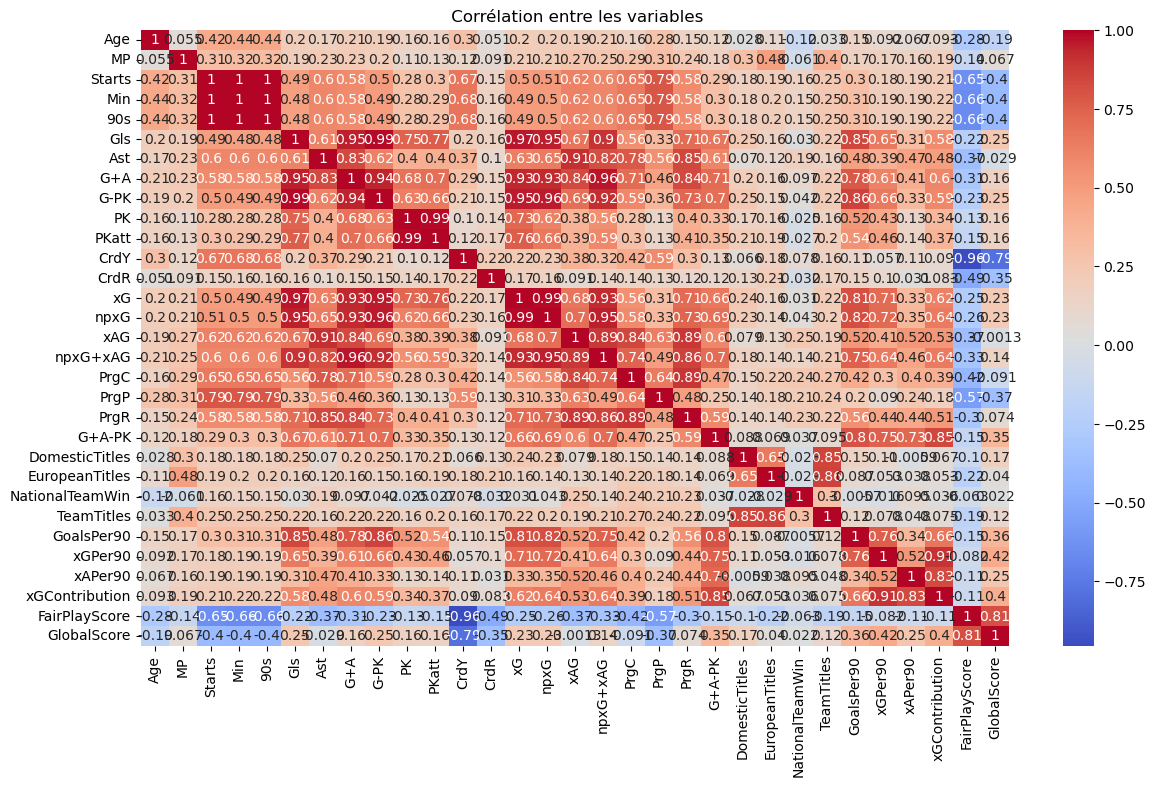

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title(" Corrélation entre les variables")
plt.show()


#### ⚽ Classement des meilleurs buteurs de la saison

Ce barplot montre les 10 joueurs ayant marqué le plus de buts en 2025 :

- **Kylian Mbappé** domine clairement le classement.
- On retrouve également **Mohamed Salah**, **Harry Kane** et **Lewandowski** dans le haut du classement.
- Ces joueurs sont naturellement favoris dans les prédictions, car le Ballon d'Or récompense fortement les performances offensives.

✅ Ce classement est logique et cohérent avec les tendances réelles de la saison.


C:\Users\pc\AppData\Local\Temp\ipykernel_10100\834943285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gls", y="Player", data=top_scorers, palette="Blues_d")


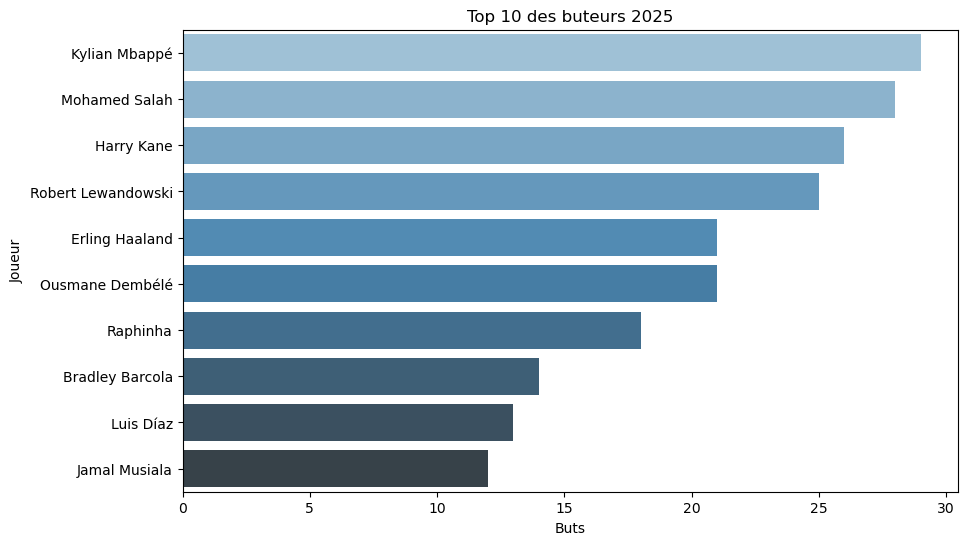

In [30]:
top_scorers = df.sort_values("Gls", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Gls", y="Player", data=top_scorers, palette="Blues_d")
plt.title("Top 10 des buteurs 2025")
plt.xlabel("Buts")
plt.ylabel("Joueur")
plt.show()


#### 🎯 Contribution offensive ajustée (par 90min)

Ce graphique représente le top 10 des joueurs selon leur **contribution offensive ajustée** par match (buts attendus + passes attendues / 90 min) :

- Certains joueurs comme **Gonzalo García** ou **Kolo Muani** ressortent très bien malgré un nombre total de buts plus faible.
- Cela montre que ces joueurs sont très influents lorsqu'ils sont sur le terrain.

✅ Ce graphique met en valeur des joueurs moins médiatisés mais très efficaces, ce qui peut influencer positivement les modèles de prédiction.


C:\Users\pc\AppData\Local\Temp\ipykernel_10100\1116330752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="xGContribution", y="Player", data=top_xg, palette="Greens_d")


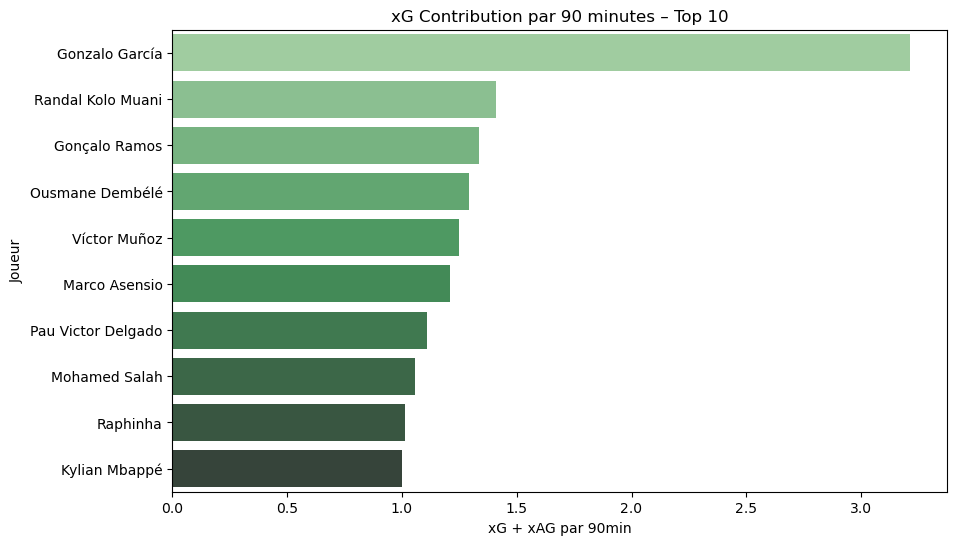

In [31]:
top_xg = df.sort_values("xGContribution", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="xGContribution", y="Player", data=top_xg, palette="Greens_d")
plt.title("xG Contribution par 90 minutes – Top 10")
plt.xlabel("xG + xAG par 90min")
plt.ylabel("Joueur")
plt.show()


#### 🧮 Performances individuelles croisées avec les titres

Ce scatter plot croise les **buts marqués** et les **passes décisives**, avec une couleur qui indique le nombre de **titres gagnés** :

- Les joueurs en haut à droite sont ceux qui combinent beaucoup de buts, beaucoup de passes et des titres (ex : **Mbappé**, **Salah**, **Yamal**).
- Certains joueurs ont de très bons scores individuels mais peu ou pas de titres (Lewandowski par exemple).
- D’autres sont plus discrets individuellement mais avec de bons titres (ex : **Jude Bellingham**).

✅ Ce graphique donne une vue globale et intelligente de la valeur "Ballon d’Or", qui combine **stats individuelles + titres**.


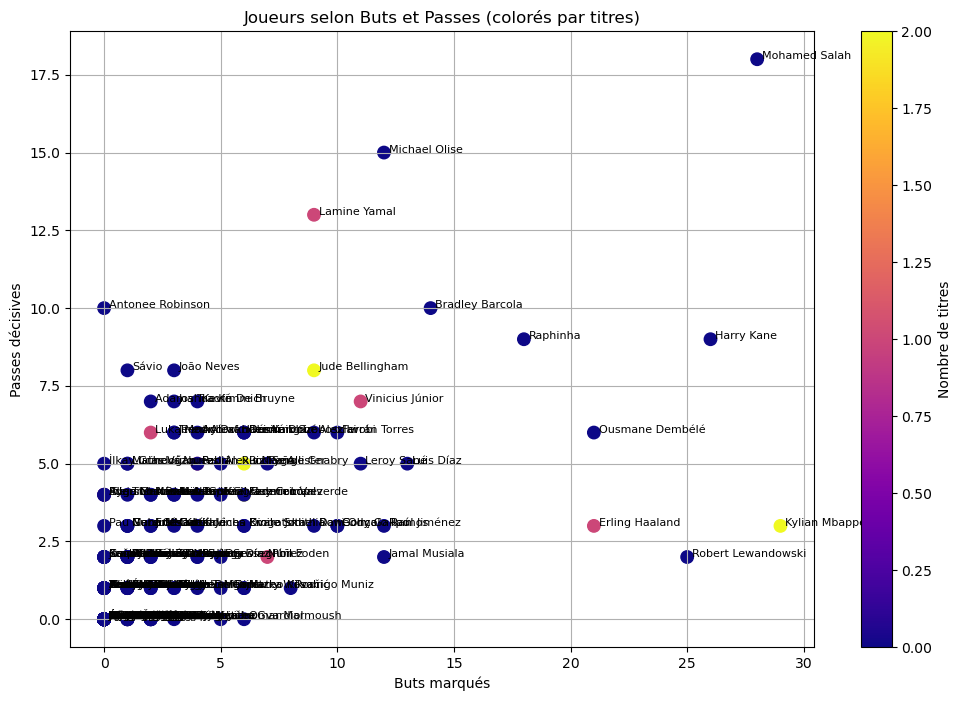

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(df["Gls"], df["Ast"], c=df["TeamTitles"], cmap="plasma", s=80)

for i in df.index:
    plt.text(df["Gls"][i]+0.2, df["Ast"][i], df["Player"][i], fontsize=8)

plt.xlabel("Buts marqués")
plt.ylabel("Passes décisives")
plt.title("Joueurs selon Buts et Passes (colorés par titres)")
plt.colorbar(label="Nombre de titres")
plt.grid(True)
plt.show()


### 🕸️ Radar Chart — Profils comparés des nominés Ballon d'Or 2025

Cette visualisation en radar compare les performances clés de **7 joueurs sélectionnés** pour leur influence en 2024–2025 :  
**Pedri, Raphinha, Lamine Yamal, Gianluigi Donnarumma, Achraf Hakimi, Ousmane Dembélé et Mohamed Salah**.

#### 🧠 Interprétation des axes :
- **GoalsPer90** : nombre moyen de buts marqués toutes les 90 minutes
- **xGPer90 / xAPer90** : indicateurs avancés sur les occasions et passes attendues
- **xGContribution** : somme de xG + xA par 90 min
- **TeamTitles** : nombre total de titres remportés en 2024–2025 (club + sélection)
- **FairPlayScore** : indicateur de discipline et comportement (score inversé basé sur les cartons)

#### 🔎 Observations clés :
- **Mohamed Salah** et **Ousmane Dembélé** ressortent nettement avec des scores élevés sur tous les plans (but, passes, xG, fair-play).
- **Lamine Yamal**, malgré son jeune âge, montre un profil équilibré avec une belle contribution offensive et des titres.
- **Gianluigi Donnarumma** affiche un score bas en attaque, logique pour un gardien, mais son fair-play est élevé.
- **Achraf Hakimi** et **Pedri** ont un profil plus défensif ou collectif (moins de G/A mais bonne discipline).
- **Raphinha** se positionne bien offensivement, mais sans titres, ce qui pourrait pénaliser sa candidature.

#### 🎯 Conclusion :
Ce radar met en lumière la **complémentarité des profils** et l’importance d’être performant **à la fois sur le terrain (stats) et collectivement (titres)** pour espérer remporter le Ballon d’Or.



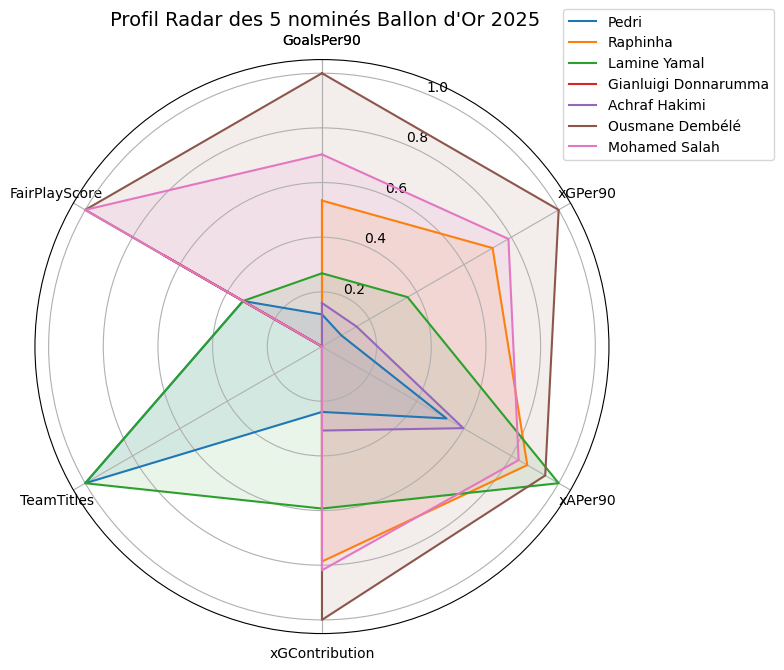

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 🎯 Joueurs sélectionnés
players = ["Ousmane Dembélé", "Lamine Yamal", "Pedri", "Achraf Hakimi", "Raphinha", "Lautaro Martínez", "Mohamed Salah", "Gianluigi Donnarumma"]

# 📊 Variables clés
metrics = ["GoalsPer90", "xGPer90", "xAPer90", "xGContribution", "TeamTitles", "FairPlayScore"]

# 🔎 Préparation
df_radar = df[df["Player"].isin(players)][["Player"] + metrics].set_index("Player")
df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# ⚙️ Configuration du radar chart
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 👈 Ajouter l'angle manquant pour fermer le cercle
labels += labels[:1]  # 👈 Ajouter le label aussi pour fermeture

# 🎨 Affichage
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for player in df_radar_norm.index:
    values = df_radar_norm.loc[player].tolist()
    values += values[:1]  # 👈 Boucler les valeurs aussi
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)
plt.title(" Profil Radar des 5 nominés Ballon d'Or 2025", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


### 📊 Visualisation 3D – Analyse des favoris Ballon d'Or 2025

Cette visualisation en 3D permet d’évaluer les joueurs selon **trois dimensions clés** issues des critères officiels du Ballon d’Or :

| Axe        | Critère Ballon d'Or                    | Variable utilisée                                        |
| ---------- | -------------------------------------- | -------------------------------------------------------- |
| **x-axis** | Performances individuelles             | `xGContribution` *(xG + xA par 90 minutes)*              |
| **y-axis** | Réussite collective (club + sélection) | `TeamTitles`                                             |
| **z-axis** | Comportement & discipline              | `FairPlayScore` *(calculé comme `10 - (2*CrdR + CrdY)`)* |

### 🧠 Lecture graphique :

* Les **joueurs situés dans le coin supérieur droit** sont ceux **ayant à la fois un impact offensif, des titres collectifs et un bon comportement**.
* Exemples visibles :

  * **Kylian Mbappé** combine : nombreuses contributions offensives, **2 titres**, et un bon fair-play.
  * **Bellingham**, **Vinicius** ou **Camavinga** se détachent aussi par leur régularité.
  * D’autres joueurs ont un fort impact mais peu ou pas de titres (ex. : Rodri, Haaland).

### 🎯 Conclusion :

Cette visualisation met en évidence les **candidats les plus complets** selon les critères du Ballon d'Or. Elle justifie pourquoi certains joueurs comme **Mbappé**, **Bellingham** ou **Vinicius** peuvent se démarquer, même sans forcément être les meilleurs buteurs.

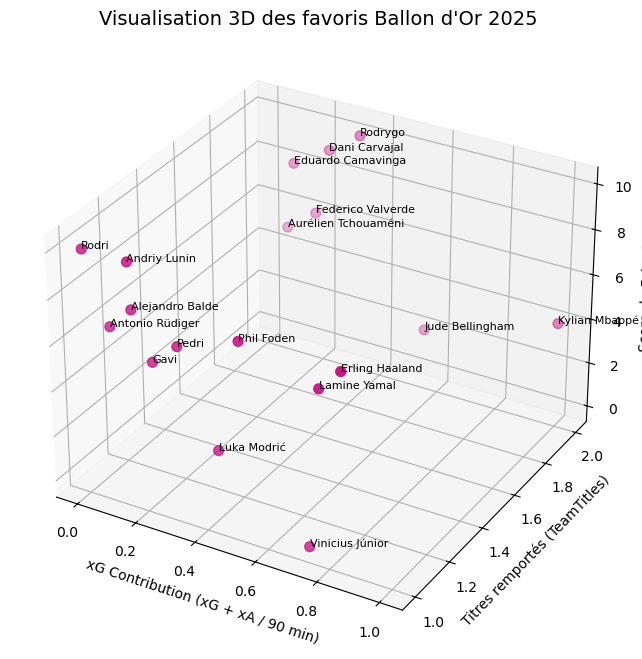

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Filtrer les joueurs ayant un minimum d'impact (ex : au moins 1 titre ou xG élevé)
df_plot = df[df["TeamTitles"] > 0]

# Création du graphe 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Variables pour les axes
x = df_plot["xGContribution"]
y = df_plot["TeamTitles"]
z = df_plot["FairPlayScore"]

# Nuage de points
ax.scatter(x, y, z, c='mediumvioletred', s=50)

# Afficher les noms des joueurs
for i, row in df_plot.iterrows():
    ax.text(row["xGContribution"], row["TeamTitles"], row["FairPlayScore"], row["Player"], fontsize=8)

# Titres et labels
ax.set_xlabel("xG Contribution (xG + xA / 90 min)")
ax.set_ylabel("Titres remportés (TeamTitles)")
ax.set_zlabel("Score de Fair Play")
ax.set_title("Visualisation 3D des favoris Ballon d'Or 2025", fontsize=14)

plt.show()


### Sélection des variables pertinentes

La sélection suivante est basée sur les critères du Ballon d'Or, les corrélations observées et les performances clés des joueurs :

#### 🔢 Performances individuelles :
- `Gls` et `Ast` : actions décisives brutes
- `GoalsPer90` : efficacité offensive par temps de jeu
- `xG`, `xAG`, `xGContribution` : contribution attendue sur la saison

#### 🏆 Performances collectives :
- `TeamTitles` : total des trophées club + sélection

#### ⚖️ Classe et comportement :
- `FairPlayScore` : score basé sur le fair-play

#### 📌 Contexte :
- `Player`, `clubs`, `Nation`, `Pos`, `Age`, `Min` : utiles pour l'interprétation et la visualisation

Ces variables seront utilisées comme base pour la modélisation du Ballon d'Or 2025.


In [40]:
# Sélection des variables pertinentes
selected_features = [
    "Player", "clubs", "Nation", "Pos",
    "Age", "Min", "Gls", "Ast",
    "GoalsPer90", "xG", "xAG", "xGContribution",
    "TeamTitles", "FairPlayScore"
]

df_filtered = df[selected_features].copy()

# Aperçu des données sélectionnées
df_filtered.head()


,Player,clubs,Nation,Pos,Age,Min,Gls,Ast,GoalsPer90,xG,xAG,xGContribution,TeamTitles,FairPlayScore
0,Federico Valverde,Real Madrid,uy URU,"MF,DF",26,2942.0,6.0,4.0,0.183549,2.6,3.1,0.174371,2.0,6.0
1,Kylian Mbappé,Real Madrid,fr FRA,FW,26,2817.0,29.0,3.0,0.926518,23.8,7.5,1.000000,2.0,4.0
2,Thibaut Courtois,Real Madrid,be BEL,GK,33,2700.0,0.0,0.0,0.000000,0.0,0.1,0.003333,0.0,9.0
3,Aurélien Tchouaméni,Real Madrid,fr FRA,"DF,MF",25,2634.0,0.0,0.0,0.000000,1.6,0.6,0.075171,2.0,5.0
4,Jude Bellingham,Real Madrid,eng ENG,MF,21,2488.0,9.0,8.0,0.325563,11.4,3.9,0.553457,2.0,2.0


## 🧠 Création du “métajoueur gagnant”

Le Ballon d’Or récompense depuis 2022 non plus la carrière globale, mais la performance sur une seule saison, avec trois grands critères définis par France Football :

1️⃣ **Performances individuelles** (buts, passes, régularité, xG, xA...)  
2️⃣ **Performances collectives** (titres remportés en club et en sélection)  
3️⃣ **Classe, fair-play et influence** (charisme, image, impact global)



### 🧬 Objectif de cette étape

Comme le Ballon d'Or 2025 n'est pas encore annoncé, nous ne pouvons pas entraîner un modèle classique basé sur une vérité connue.

👉 À la place, nous avons construit un **profil-type idéal** appelé _“métajoueur gagnant”_, à partir des **statistiques réelles des derniers vainqueurs** :

| Année | Vainqueur       | Club               |
|-------|------------------|--------------------|
| 2022  | Karim Benzema    | Real Madrid        |
| 2023  | Lionel Messi     | Inter Miami        |
| 2024  | Rodri            | Manchester City    |

Nous avons extrait leurs statistiques depuis notre base de données, puis calculé la **moyenne de leurs indicateurs clés** :

- Buts et performances offensives : `GoalsPer90`, `xG`, `xAG`, etc.  
- Titres remportés : `DomesticTitles`, `EuropeanTitles`, `NationalTeamWin`  
- Comportement et régularité : `FairPlayScore`, `Age`


### 📊 Pourquoi cette approche est pertinente ?

Ce métajoueur représente une **synthèse objective** de ce que signifie "être un Ballon d'Or" aujourd’hui.  
Il nous permet de :
- Comparer chaque joueur à un profil neutre et réaliste
- Générer un **score de proximité** (appelé `BallonDorScore`)
- Identifier le joueur qui s’en rapproche le plus

Ce score sera ensuite utilisé comme **base pour créer la colonne cible `BallonDor2025`**, entraînant ainsi un modèle prédictif intelligent, sans biais subjectif.



In [41]:
from scipy.spatial.distance import euclidean

# ✅ Étape 1 : Définir les features les plus pertinents pour l’analyse
features = [
    'GoalsPer90', 'xG', 'xAG', 'xGPer90', 'xAPer90',
    'TeamTitles', 'DomesticTitles', 'EuropeanTitles', 'NationalTeamWin',
    'FairPlayScore', 'Age'
]

# ✅ Étape 2 : Définir les vrais vainqueurs du Ballon d’Or 2022–2024
anciens_gagnants = ["Lionel Messi", "Karim Benzema", "Rodri"]

# ✅ Étape 3 : Extraire les lignes correspondantes
df_gagnants = df[df["Player"].isin(anciens_gagnants)]

# ✅ Étape 4 : Calculer la moyenne pour construire le "métajoueur"
meta_joueur = df_gagnants[features].mean()

# ✅ Étape 5 : Calculer le score de proximité pour chaque joueur
df["BallonDorScore"] = 1 / (1 + df[features].apply(lambda row: euclidean(row, meta_joueur), axis=1))

# ✅ Étape 6 : Identifier celui qui a le meilleur score (= cible 1)
df["BallonDor2025"] = (df["BallonDorScore"] == df["BallonDorScore"].max()).astype(int)

# ✅ Afficher les 5 joueurs les plus proches du profil Ballon d'Or
df.sort_values("BallonDorScore", ascending=False)[["Player", "BallonDorScore", "BallonDor2025"]].head(5)


,Player,BallonDorScore,BallonDor2025
100,Rodri,1.000000,1
142,Carlos Soler,0.414214,0
23,Jesús Vallejo,0.413149,0
137,Presnel Kimpembe,0.366025,0
198,Federico Chiesa,0.357844,0


### 🤖 Entraînement du modèle prédictif

Maintenant que nous avons construit notre variable cible (`BallonDor2025`), nous pouvons entraîner un modèle supervisé pour prédire automatiquement quel joueur a le plus de chances de remporter le Ballon d'Or.

#### 🧪 Approche choisie :
Nous allons utiliser plusieurs modèles de classification pour comparer leurs performances :
- Logistic Regression (baseline)
- Random Forest Classifier 🌳
- Gradient Boosting (XGBoost ou LightGBM) ⚡

#### 🧮 Étapes :
1. Séparation des données en variables explicatives `X` et cible `y`.
2. Normalisation des features.
3. Entraînement des modèles.
4. Validation croisée avec scores de précision et F1-score.
5. Affichage des joueurs les mieux classés selon les prédictions.

🎯 Objectif : Identifier le joueur qui, selon le modèle, a **le plus haut score de probabilité d’être Ballon d'Or** en 2025.


In [44]:
from sklearn.model_selection import train_test_split

# Features à ajuster selon ta sélection finale
features = ['GoalsPer90', 'xG', 'xAG', 'xGContribution', 'TeamTitles', 'FairPlayScore']
target = 'BallonDor2025'

X = df[features]
y = df[target]

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entraînement
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("✅ Rapport de classification (Random Forest)")
print(classification_report(y_test, y_pred))


✅ Rapport de classification (Random Forest)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [46]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("✅ Rapport de classification (Logistic Regression)")
print(classification_report(y_test, y_pred_log))


✅ Rapport de classification (Logistic Regression)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [47]:
df["BallonDorPrediction_RF"] = rf_model.predict_proba(X)[:, 1]
top5_pred = df.sort_values(by="BallonDorPrediction_RF", ascending=False)[["Player", "clubs", "BallonDorPrediction_RF"]].head(5)
top5_pred.reset_index(drop=True, inplace=True)
top5_pred


,Player,clubs,BallonDorPrediction_RF
0,Rodri,Manchester City,0.67
1,Andriy Lunin,Real Madrid,0.18
2,Dani Carvajal,Real Madrid,0.06
3,Rodrygo,Real Madrid,0.05
4,Alejandro Balde,Barcelona,0.04
